In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,NaN,NaN,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print()

id
[    2539     2595     3647 ... 36485431 36485609 36487245]
48895

name
['clean_&_quiet_apt_home_by_the_park' 'skylit_midtown_castle'
 'the_village_of_harlem....new_york_!' ...
 'sunny_studio_at_historical_neighborhood'
 '43rd_st._time_square-cozy_single_bed'
 "trendy_duplex_in_the_very_heart_of_hell's_kitchen"]
47486

host_id
[     2787      2845      4632 ... 274321313  23492952  68119814]
37457

host_name
['john' 'jennifer' 'elisabeth' ... 'abayomi' 'alberth' 'ilgar_&_aysel']
11428

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

neighbourhood
['kensington' 'midtown' 'harlem' 'clinton_hill' 'east_harlem'
 'murray_hill' 'bedford-stuyvesant' "hell's_kitchen" 'upper_west_side'
 'chinatown' 'south_slope' 'west_village' 'williamsburg' 'fort_greene'
 'chelsea' 'crown_heights' 'park_slope' 'windsor_terrace' 'inwood'
 'east_village' 'greenpoint' 'bushwick' 'flatbush' 'lower_east_side'
 'prospect-lefferts_gardens' 'long_island_city' 'kips_bay' 'soho'
 'upp

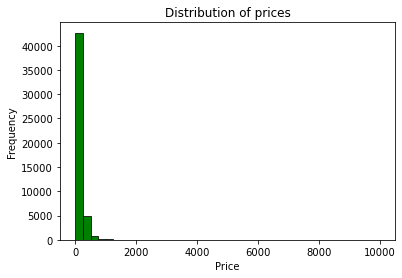

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price, bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

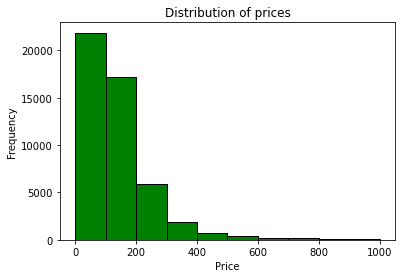

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 1000], bins=10, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

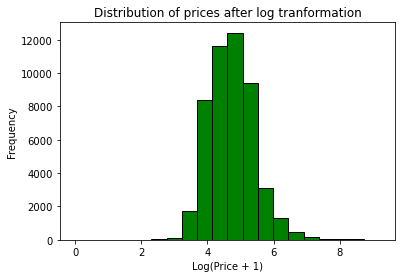

In [11]:
log_price = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=20, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [12]:
#df_new=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [13]:
#df_new.head(5)

Find a feature with missing values. How many missing values does it have?

In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

What's the median (50% percentile) for variable 'minimum_nights'?

In [15]:
df['minimum_nights'].median()

3.0

Split the data

In [16]:
np.random.seed(42)
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [17]:
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['price']
del df_val['price']
del df_test['price']

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [19]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Dealing with missing values

In [20]:
df_train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,come_and_go_as__you_please_in_bkln!,1631733,jane,brooklyn,kensington,40.64354,-73.97777,entire_home/apt,3,62,2019-01-02,0.71,1,189
44383,34205267,"spacious,_sunny_room_in_queens/brooklyn",913940,giancarlo,queens,ridgewood,40.70666,-73.90779,private_room,21,0,NaN,NaN,1,73
15394,12342297,private_bedroom_in_high-ceiling_4br_apartment!,19953913,alejandro,manhattan,hell's_kitchen,40.76116,-73.99016,private_room,2,17,2017-04-28,0.43,1,0
43230,33527778,sonder_|_stock_exchange_|_stunning_3br_+_kitchen,219517861,sonder_(nyc),manhattan,financial_district,40.70763,-74.01050,entire_home/apt,2,5,2019-06-02,1.88,327,272
16332,13136376,spacious_2_bedroom_with_balcony,16110448,gingie,manhattan,east_harlem,40.79658,-73.93287,entire_home/apt,2,30,2019-06-03,0.80,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,11923007,trendy_&_spacious_williamsburg_apt,7640852,markus,brooklyn,williamsburg,40.71178,-73.95779,private_room,2,0,NaN,NaN,1,0
14661,11581737,1_bedroom_apt_-_near_central_park,196298,hiershenee_b.,manhattan,upper_west_side,40.78638,-73.97004,entire_home/apt,30,10,2019-01-08,0.40,1,0
24515,19717723,tiny_studio_in_eastvillage,49656804,marija,manhattan,east_village,40.72716,-73.98524,entire_home/apt,3,75,2019-07-01,3.12,1,60
31460,24489174,"comfortable,spacious,clean_private_room",184523531,june,manhattan,east_harlem,40.79578,-73.94523,private_room,2,31,2019-06-23,2.10,1,265


In [21]:
base=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [22]:
df_train[base]

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30
...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,2,0,NaN,1,0
14661,40.78638,-73.97004,30,10,0.40,1,0
24515,40.72716,-73.98524,3,75,3.12,1,60
31460,40.79578,-73.94523,2,31,2.10,1,265


In [23]:
df_train[base].isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [24]:
df1=df_train[base].copy()
df1

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30
...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,2,0,NaN,1,0
14661,40.78638,-73.97004,30,10,0.40,1,0
24515,40.72716,-73.98524,3,75,3.12,1,60
31460,40.79578,-73.94523,2,31,2.10,1,265


In [25]:
X_train1=df1.fillna(0).values
X_train1

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [26]:
w0,w=train_linear_regression(X_train1, y_train)

In [27]:
y_pred1=w0+X_train1.dot(w)

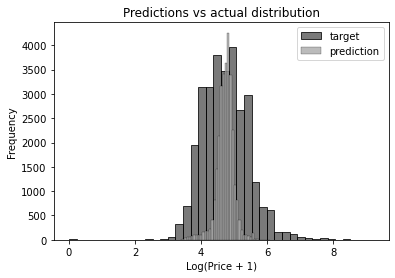

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred1, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [29]:
rmse(y_train, y_pred1)

0.6428860484860424

In [30]:
X_val1=df_val[base].fillna(0).values

In [31]:
y_pred1=w0+X_val1.dot(w)

In [32]:
rmse(y_val,y_pred1)

0.6430337788422453

In [33]:
df2=df_train[base].copy()

In [34]:
m=df2['reviews_per_month'].mean()
X_train2=df2.fillna(m).values
X_train2

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [35]:
w0,w=train_linear_regression(X_train2, y_train)

In [36]:
y_pred2=w0+X_train2.dot(w)

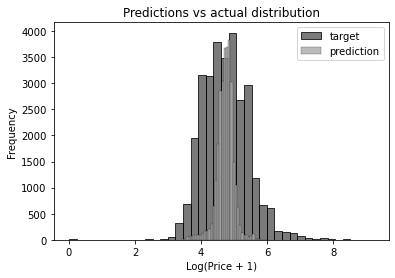

In [37]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred2, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [38]:
rmse(y_train, y_pred2)

0.6429347474014213

In [39]:
X_val2=df_val[base].fillna(m).values
X_val2

array([[ 4.066431e+01, -7.393216e+01,  3.000000e+00, ...,  3.300000e-01,
         1.000000e+00,  1.580000e+02],
       [ 4.070631e+01, -7.392064e+01,  2.000000e+00, ...,  2.600000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.085244e+01, -7.393126e+01,  2.000000e+00, ...,  2.900000e-01,
         2.000000e+00,  1.600000e+01],
       ...,
       [ 4.083987e+01, -7.394279e+01,  2.000000e+00, ...,  3.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.078804e+01, -7.395382e+01,  5.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071508e+01, -7.397895e+01,  2.000000e+00, ...,  2.880000e+00,
         1.000000e+00,  2.700000e+01]])

In [40]:
y_pred2=w0+X_val2.dot(w)

In [41]:
rmse(y_val,y_pred2)

0.6427545031694782

Regularization

In [42]:
def train_linear_regression_reg(X, y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [43]:
X_train=df_train[base].fillna(0).values

In [44]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w_0 + X_train.dot(w)
    rmse(y_train, y_pred)

    X_val = df_val[base].fillna(0).values
    y_pred = w_0 + X_val.dot(w)
    print(r, round(rmse(y_val, y_pred),2))

0 0.64
1e-06 0.64
0.0001 0.64
0.001 0.64
0.01 0.66
0.1 0.68
1 0.68
5 0.68
10 0.68


Standard Deviation

In [45]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train=df_train[base].fillna(0).values
    w0,w=train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)
    rmse(y_train, y_pred)

    X_val = df_val[base].fillna(0).values
    y_pred = w0 + X_val.dot(w)
    rmse_score=rmse(y_val, y_pred)
    std=np.std(rmse_score,dtype=np.float64)
    print(s,(rmse_score))
    
print('std=',std)

#print(std)

0 0.6549779961365332
1 0.6462523685579479
2 0.6476558177594801
3 0.6375145070819096
4 0.6445809082983163
5 0.6305809996428791
6 0.629785191710315
7 0.6506184266843091
8 0.6489780353328047
9 0.6437565168218967
std= 0.0


In [46]:
np.random.seed(9)
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['price']
del df_val['price']
del df_test['price']

In [47]:
df_full_train = pd.concat([df_train, df_val])

In [48]:
df_full_train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25415,20325986,brooklyn_condominium_-_bushwick,145013050,dylan,brooklyn,bushwick,40.70423,-73.91595,private_room,1,3,2017-09-01,0.13,1,0
1329,582372,comfy_new_york_city_launching_pad!!,733370,tim,queens,astoria,40.77115,-73.92275,private_room,40,23,2016-07-01,0.27,1,207
31738,24751022,sonder_|_hanover_square_|_welcoming_1br_+_rooftop,12243051,sonder,manhattan,financial_district,40.70401,-74.00932,entire_home/apt,29,0,NaN,NaN,96,1
21784,17512282,amazing_apartment_|_skyline_views,3191545,kyle,manhattan,murray_hill,40.74526,-73.97679,entire_home/apt,30,1,2017-05-26,0.04,23,365
38653,30376150,nelson-hamilton_family,225750872,lauria,queens,far_rockaway,40.59349,-73.76377,private_room,1,1,2018-12-30,0.16,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,27527902,cozy_1_bedroom_apartment_in_trendy_bushwick.,101144679,jorge,brooklyn,bushwick,40.69440,-73.92420,entire_home/apt,3,26,2019-06-15,2.43,1,3
27412,21619743,cute_one-bedroom_apartment_with_exposed_brick,9450412,taelyr,brooklyn,crown_heights,40.67133,-73.94526,entire_home/apt,2,8,2018-10-21,0.40,1,0
26650,21190502,cozy_small_studio_in_manhattan!_east_village!,8628273,rafael,manhattan,east_village,40.72982,-73.98593,entire_home/apt,2,2,2018-11-14,0.11,1,0
9573,7348509,modern_1br_in_heart_of_williamsburg,38497438,don,brooklyn,williamsburg,40.71969,-73.95620,entire_home/apt,1,1,2015-08-02,0.02,1,0


In [49]:
df_full_train = df_full_train.reset_index(drop=True)

In [50]:
X_full_train=df_full_train[base].fillna(0).values
y_full_train = np.concatenate([y_train, y_val])

In [51]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [52]:
y_pred = w0 + X_full_train.dot(w)
rmse(y_full_train, y_pred)

0.6453578556352733

In [53]:
X_test = df_test[base].fillna(0).values
y_pred = w0 + X_test.dot(w)
score=rmse(y_test, y_pred)

In [54]:
score

0.6452771348684564